# Daily Financial News for 6000+ Stocks
## Some Data Preparation
@author DHR <br>
### a bit of Data Uderstanding
used Data in this Notebook: 'https://www.kaggle.com/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests'

import requiered modules

In [1]:
#immport basic DataScience Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Load Data

In [2]:
data = pd.read_csv('../data/raw_analyst_ratings.csv')
#colums: id,headline,url,publisher,date,stock

In [3]:
print(data.columns)
data.head()

Index(['id', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


id                                           headline  \
0   0            Stocks That Hit 52-Week Highs On Friday   
1   1         Stocks That Hit 52-Week Highs On Wednesday   
2   2                      71 Biggest Movers From Friday   
3   3       46 Stocks Moving In Friday's Mid-Day Session   
4   4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00     A  
3  2020-05-22 12:45:06-04:00     A  
4  2020-05-22 11:38:59-04:00     A

In [4]:
print("observations: {}, features: {} \n".format(data.shape[0], data.shape[1]))
print("unique headlines: {}, unique stocks: {} \n".format(len(data.headline.unique()), len(data.stock.unique())))

observations: 1407328, features: 6 

unique headlines: 845770, unique stocks: 6204 



In [5]:
stock = data.groupby("stock")
stock.head()

id                                           headline  \
0              0            Stocks That Hit 52-Week Highs On Friday   
1              1         Stocks That Hit 52-Week Highs On Wednesday   
2              2                      71 Biggest Movers From Friday   
3              3       46 Stocks Moving In Friday's Mid-Day Session   
4              4  B of A Securities Maintains Neutral on Agilent...   
...          ...                                                ...   
1407261  1413782  China Zenix Auto International Announces Inten...   
1407262  1413783        China Zenix Auto Shares Halted News Pending   
1407263  1413784  China Zenix Auto Q1 EPS $0.08, Made $130.123M ...   
1407264  1413785  China Zenix Auto Reports Q4 EPS $0.03, Sales $...   
1407265  1413786  UPDATE: Not Seeing News In Chinese Momentum St...   

                                                       url          publisher  \
0        https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1        https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2        https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3        https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4        https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   
...                                                    ...                ...   
1407261  https://www.benzinga.com/news/18/06/11886479/c...  Benzinga Newsdesk   
1407262  https://www.benzinga.com/news/18/06/11876679/c...  Benzinga Newsdesk   
1407263  https://www.benzinga.com/news/earnings/18/05/1...  Benzinga Newsdesk   
1407264  https://www.benzinga.com/news/earnings/18/03/1...       Eddie Staley   
1407265  https://www.benzinga.com/movers/18/01/10994548...      Paul Quintaro   

                              date stock  
0        2020-06-05 10:30:54-04:00     A  
1        2020-06-03 10:45:20-04:00     A  
2        2020-05-26 04:30:07-04:00     A  
3        2020-05-22 12:45:06-04:00     A  
4        2020-05-22 11:38:59-04:00     A  
...                            ...   ...  
1407261  2018-06-15 09:01:12-04:00    ZX  
1407262  2018-06-13 16:52:35-04:00    ZX  
1407263  2018-05-17 06:01:41-04:00    ZX  
1407264  2018-03-15 06:01:22-04:00    ZX  
1407265  2018-01-05 11:52:01-04:00    ZX  

[29234 rows x 6 columns]

Data Visualization

In [6]:
#import optional Packages
from wordcloud import WordCloud, STOPWORDS
import nltk #tokenization
#nltk.download('punkt')

Text(0, 0.5, 'Number of Headlines')

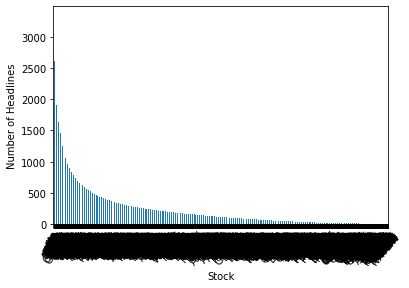

In [7]:
#number of headlines by stock
stock.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Stock")
plt.ylabel("Number of Headlines")

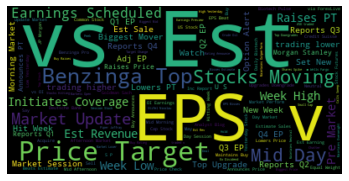

In [8]:
#Wordcloud
#combine all headlines to one text
text = " ".join(headline for headline in data.headline)

stopwords = STOPWORDS
stopwords.update(["benzinga, stocks"])
wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("../data/wordcloud.png")

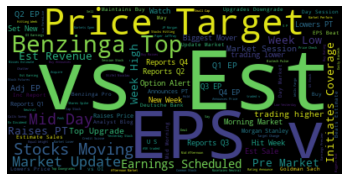

In [9]:
#Wordcloud for a Stock
text_stock = " ".join(headline for headline in data[data["stock"]=="A"].headline)

stopwords = STOPWORDS
stopwords.update(["benzinga, stocks"])
wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("../data/wordcloud_specificStock.png")

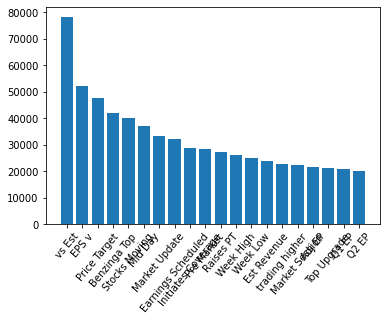

In [27]:
#Top Words
text = " ".join(headline for headline in data.headline)
wordFreq = WordCloud().process_text(text)
wordFreq = dict(sorted(wordFreq.items(), key=lambda item: item[1], reverse=True)[:20])

plt.bar(range(len(wordFreq)), list(wordFreq.values()), align='center')
plt.xticks(range(len(wordFreq)), list(wordFreq.keys()), rotation=50)
plt.show()

Topic Modelling ?

### complement data with Stock Prices
use API : 'https://polygon.io/'
(need timeouts because of max 5 Api calls per Minute)